In [2]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np

In [80]:
img = img_as_float(io.imread('pearl_processed.jpg'))

In [81]:
img.shape

(704, 939, 3)

(array([   523.,   3212.,   4290.,   9382.,   8303.,  15134.,  11489.,
         19009.,  13582.,  20669.,  21641.,  14456.,  22063.,  14624.,
         21039.,  14243.,  21168.,  13383.,  19909.,  13095.,  18987.,
         18619.,  13248.,  18130.,  10962.,  15175.,   9490.,  13991.,
          8891.,  12660.,  12111.,   8150.,  11984.,   8016.,  11442.,
          7141.,  11248.,   7452.,  11372.,   7377.,  11097.,  11204.,
          7871.,  11565.,   7669.,  12301.,   8297.,  12955.,   9003.,
         14386.,  14602.,   9863.,  15900.,  11153.,  17344.,  12368.,
         19661.,  13946.,  22551.,  16163.,  26091.,  30036.,  22553.,
         37905.,  30248.,  57242.,  53278., 112638.,  83184., 124415.,
        119477.,  76306., 102825.,  59244.,  68980.,  34737.,  39409.,
         20557.,  24064.,  12396.,  14511.,  10772.,   5836.,   6767.,
          3606.,   4151.,   2193.,   2714.,   1456.,   1712.,   1364.,
           705.,    901.,    459.,    496.,    305.,    566.,    478.,
      

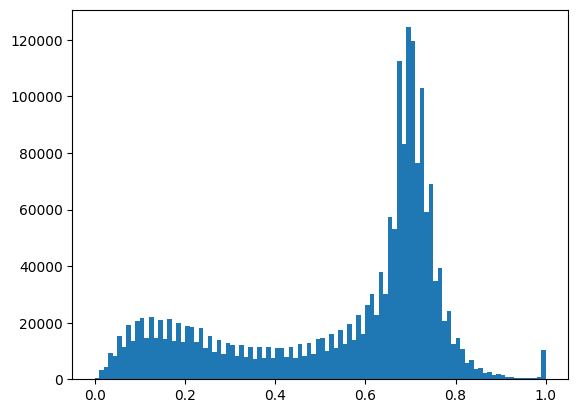

In [82]:
plt.hist(img.flat, bins=100, range=(0, 1)) 

In [83]:
denoise_img = img

In [20]:
from skimage.restoration import denoise_nl_means, estimate_sigma

sigma_est = np.mean(estimate_sigma(img, average_sigmas=True, channel_axis=-1 ))


In [44]:
patch_kw= dict(patch_size=5,patch_distance=6)

In [45]:
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,**patch_kw)

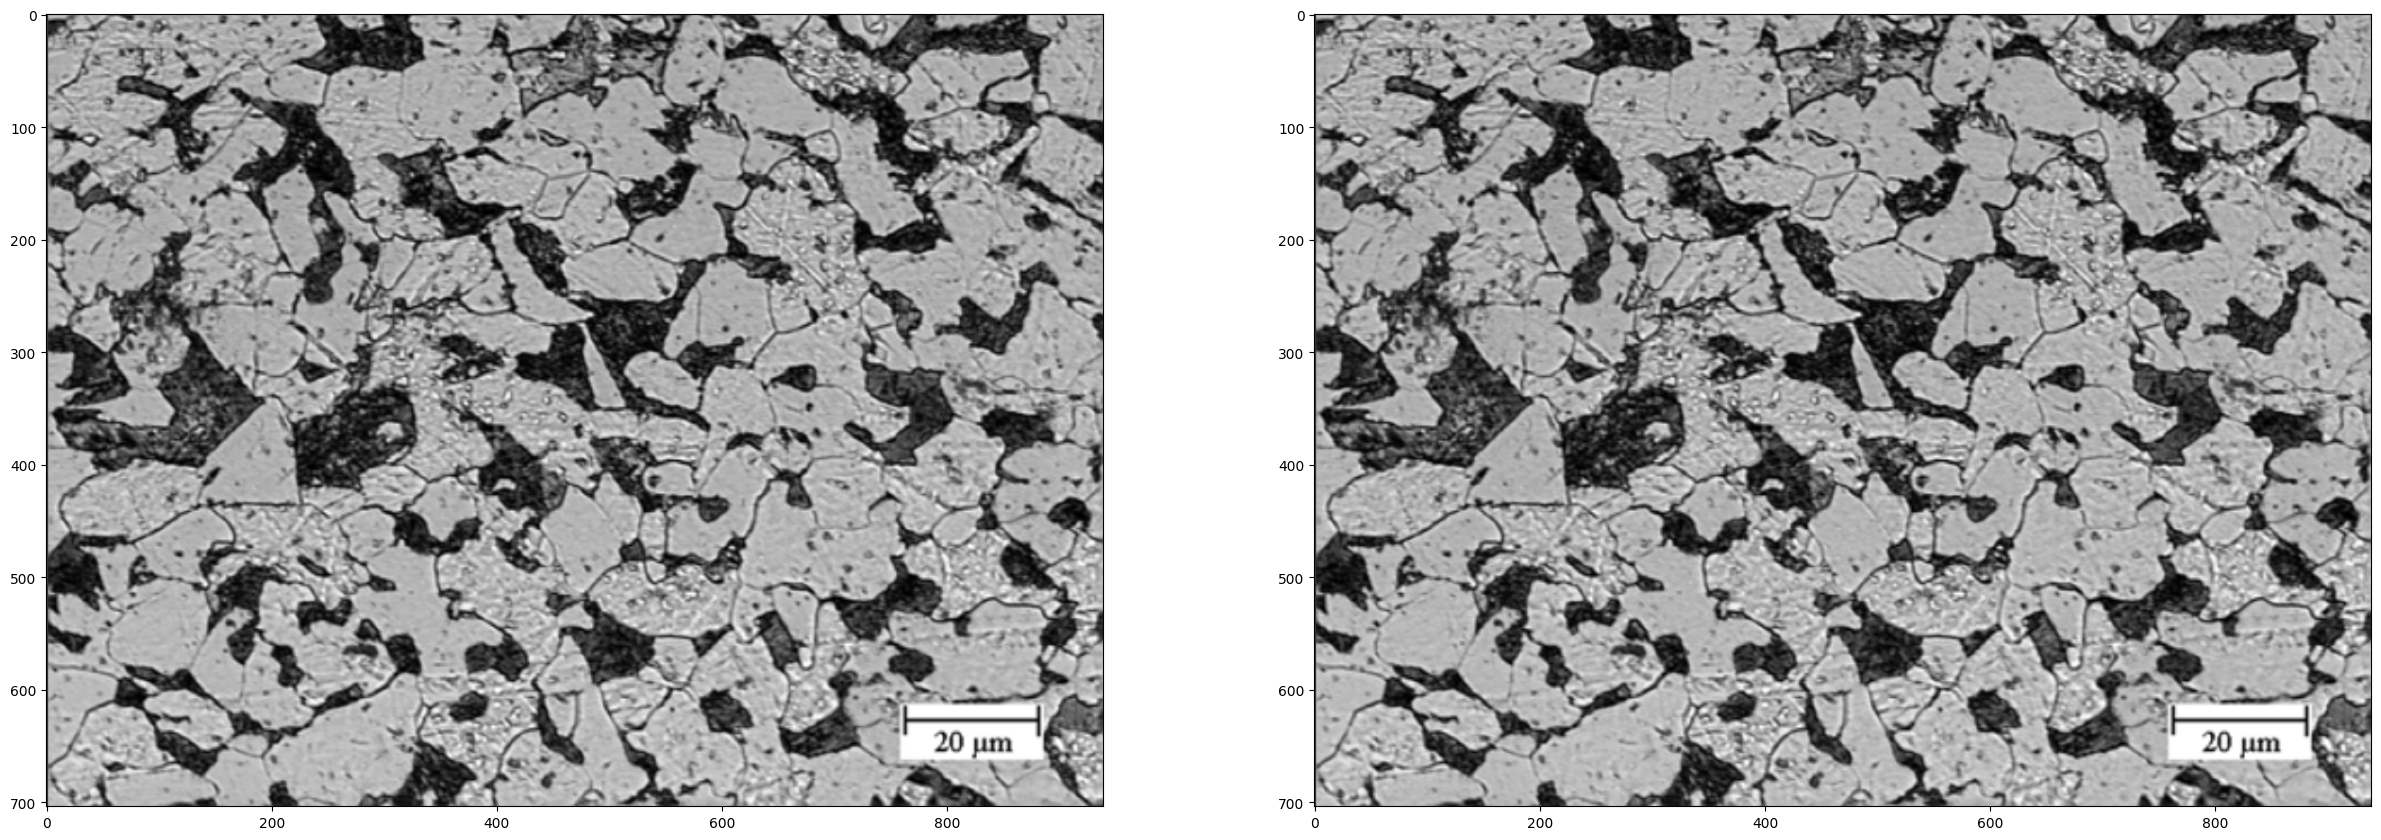

In [39]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(denoise_img)
plt.subplot(1, 2, 2)
plt.imshow(img)


(array([  1734.,   4596.,   4758.,  10050.,   8262.,  14505.,  11340.,
         17904.,  12873.,  19923.,  20442.,  13764.,  21018.,  13977.,
         20883.,  14313.,  20379.,  13569.,  19872.,  12711.,  20729.,
         17427.,  13445.,  16050.,  12806.,  15282.,   9522.,  14229.,
          8823.,  13104.,  12408.,   8220.,  12045.,   8031.,  11700.,
          7674.,  11640.,   7956.,  11406.,   7569.,  11478.,  11397.,
          7797.,  12276.,   7833.,  12465.,   8466.,  13335.,   9162.,
         15138.,  14721.,  10404.,  16407.,  11436.,  18219.,  12663.,
         20883.,  14364.,  24378.,  25821.,  19611.,  32040.,  25539.,
         42795.,  34386.,  63180.,  55119.,  91890.,  77853., 107001.,
        104679.,  74526.,  92175.,  57999.,  70902.,  39657.,  44556.,
         24699.,  28239.,  15216.,  17607.,  13836.,   7017.,   8457.,
          4875.,   5301.,   2946.,   3606.,   1884.,   2286.,   1707.,
          1014.,   1149.,    594.,    651.,    483.,   1146.,    249.,
      

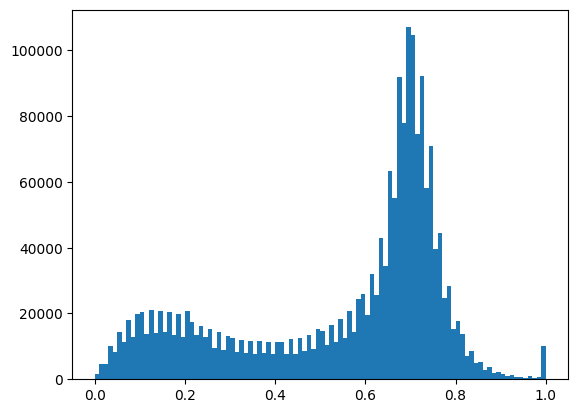

In [34]:
plt.hist(denoise_img.flat, bins=100, range=(0, 1)) 

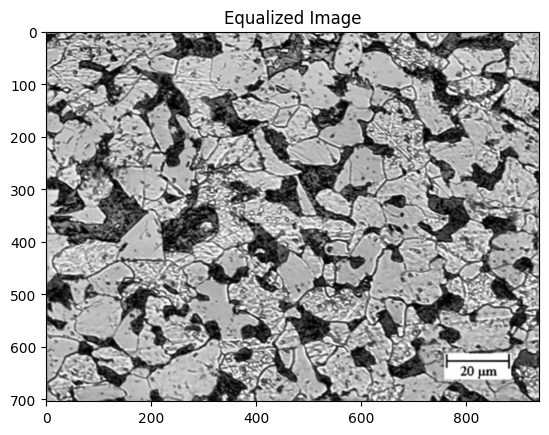

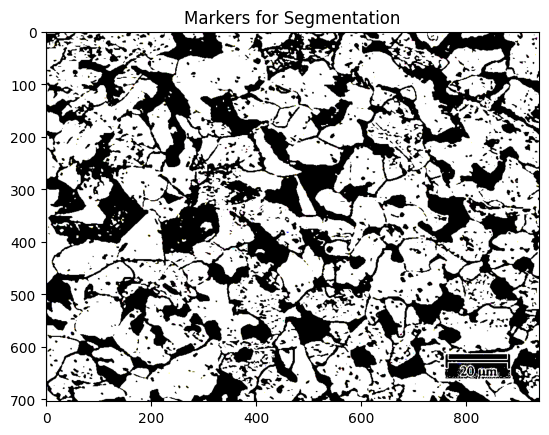

In [84]:
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

# Assumptions:
# denoise_img is a single-channel grayscale image
# img is the original image for which you want to create markers
# Ensure that markers are created based on the original image, not the denoised image if you intend to use them for segmentation

# Apply adaptive histogram equalization
eq_img = exposure.equalize_adapthist(denoise_img)

# Display the equalized image
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
plt.show()


# Create markers for segmentation based on original image
markers = np.zeros(eq_img.shape, dtype=np.float64)
markers[(eq_img < 0.5) & (eq_img > 0)] = 0
markers[(eq_img > 0.5) & (eq_img < 0.99)] = 1


# Display the markers
plt.imshow(markers, cmap='gray')
plt.title('Markers for Segmentation')
plt.show()


In [85]:
from skimage.segmentation import random_walker

# Run random walker algorithm
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker

labels = random_walker(eq_img, markers, beta=10, mode='bf')
plt.imsave("markers.jpg", markers)
segm1 = (labels == 1)
segm2 = (labels == 0)
# all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

# all_segments[segm1] = (1,0,0)
# all_segments[segm2] = (0,1,0)

In [111]:
from skimage import io, morphology, util

# Load the image in grayscale
image_path = 'markers.jpg'
image = io.imread(image_path, as_gray=True)

# Convert image to binary (thresholding)
# Note: skimage uses inverse binary (objects are white), so we invert the image
binary_image = util.invert(image > 0.5)  # Threshold value to create the binary image

# Remove small objects
# Here, 'min_size' parameter is set to 100, which is the minimum size of objects to keep
cleaned_image = morphology.remove_small_objects(binary_image, min_size=300)

# Invert the image again to match the original appearance (black objects on white background)
cleaned_image = util.invert(cleaned_image)

# Save the resulting image
result_image_path = 'test.jpg'
io.imsave(result_image_path, util.img_as_ubyte(cleaned_image))


In [112]:
from skimage import io, morphology, util

# Load the image in grayscale
image_path = 'test.jpg'
image = io.imread(image_path, as_gray=True)

# Convert image to binary (thresholding)
# Note: skimage uses inverse binary (objects are white), so we invert the image
binary_image = util.invert(image < 0.5)  # Threshold value to create the binary image

# Remove small objects
# Here, 'min_size' parameter is set to 100, which is the minimum size of objects to keep
cleaned_image = morphology.remove_small_objects(binary_image, min_size=300)

# Invert the image again to match the original appearance (black objects on white background)
cleaned_image = util.invert(cleaned_image)

# Save the resulting image
result_image_path = 'test.jpg'
io.imsave(result_image_path, util.img_as_ubyte(cleaned_image))